<a href="https://colab.research.google.com/github/akulczy/EmbeddingsClustering/blob/main/EmbeddingsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries import

This section contains code to download and import the libraries utilised for the project. 

In [ ]:
!pip install transformers
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
     |████████████████████████████████| 596 kB 84.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 4.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=b8bfcda73d8cc56651802f46baf9cc7acc1233c947fae0753224ef45730da904
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install hdbscan
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340313 sha256=62c289f52ef625e69341e6764d6ee231a37a92b2c46a22a714df88d565be697a
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 23.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=63f8b015bb07e11356451ab922fcb86aed379a90ba6c590d214e5a55baa36cb3
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
from contextlib import ExitStack
import importlib
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, TrainingArguments, Trainer
import tensorflow as tf
import tensorflow.keras as tk
from keras.models import Model
import keras

import numpy as np
import pandas as pd
import json
import string
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import preprocessor as p
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import hdbscan
from umap import UMAP

import pickle
import joblib
import time

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import logging
import random
from sklearn.manifold import TSNE
import seaborn as sns; sns.set_theme()

In [ ]:
!spacy download pl_core_news_sm
import spacy
from spacy.lang.pl.examples import sentences 

nlp = spacy.load("pl_core_news_sm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 136 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [ ]:
import gensim

from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.utils import simple_preprocess
import re
import string
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from pprint import pprint

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.1 MB/s 


In [ ]:
from unidecode import unidecode
from collections import Counter

In [ ]:
# Cleaning the cache
torch.cuda.empty_cache()

In [ ]:
# To break the textual output into lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Demo

This section of the notebook contains code which presents the demo phases of the UMAP dimensionality reduction with HDBSCAN clustering, and LDA topic modelling. The demo version was adjusted for the exemplary dataset which is included within the final project's submission.

#### UMAP dimensionality reduction and HDBSCAN clustering

In [ ]:
# Read the csv file containing the data
df = pd.read_csv('exemplary_dataset.csv')

In [ ]:
# Read in the embeddings - HerBERT, GloVe and doc2vec
herbert_embeds = np.load('HerBERT_embeds.npy')
glove_embeds = np.load('GloVe_embeds.npy')
doc2vec_embeds = np.load('doc2vec_embeds.npy')

In [ ]:
# Reduce dimensionality of the HerBERT embeddings using the UMAP algorithm
umap_herbert = UMAP(n_neighbors=10, n_components=20, min_dist=0, metric='cosine', random_state=42).fit_transform(herbert_embeds)

In [ ]:
# Reduce dimensionality of the GloVe embeddings using the UMAP algorithm
umap_glove = UMAP(n_neighbors=10, n_components=5, min_dist=0, metric='cosine', random_state=42).fit_transform(glove_embeds)

In [ ]:
# Reduce dimensionality of the doc2vec embeddings using the UMAP algorithm
umap_doc2vec = UMAP(n_neighbors=10, n_components=5, min_dist=0, metric='cosine', random_state=42).fit_transform(doc2vec_embeds)

In [ ]:
# Method to generate and return clusters using HDBSCAN
def hdbscan_clusters(umap_embeddings,
                    min_cluster_size,
                    min_samples,
                    random_state = None):
    
    # Apply HDBSCAN clustering on the previously UMAP-reduced embeddings
    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               min_samples = min_samples,
                               metric='manhattan', 
                               cluster_selection_method='leaf',
                               gen_min_span_tree=True, 
                               prediction_data=True).fit(umap_embeddings) 

    return clusters

In [ ]:
# Obtain clusters over HerBERT embeddings
clusters_herbert = hdbscan_clusters(umap_herbert, 5, 1)

In [ ]:
# Obtain clusters over GloVe embeddings
clusters_glove = hdbscan_clusters(umap_glove, 5, 1)

In [ ]:
# Obtain clusters over doc2vec embeddings
clusters_doc2vec = hdbscan_clusters(umap_doc2vec, 5, 1)

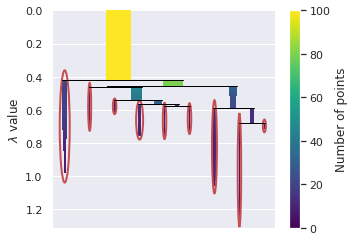

In [ ]:
# Print condensed trees visualising the clusters

# Condensed tree for clusters yielded over HerBERT embeddings
clusters_herbert.condensed_tree_.plot(select_clusters=True)
plt.rcParams["figure.figsize"] = (5, 4)

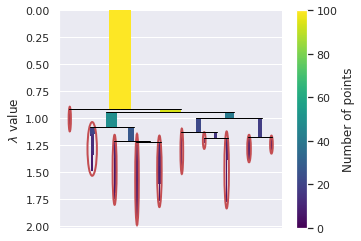

In [ ]:
# Condensed tree for clusters yielded over GloVe embeddings
clusters_glove.condensed_tree_.plot(select_clusters=True)
plt.rcParams["figure.figsize"] = (5, 4)

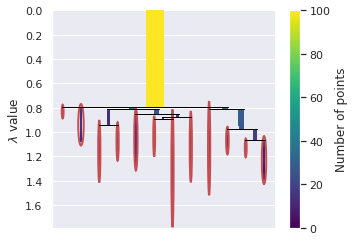

In [ ]:
# Condensed tree for clusters yielded over doc2vec embeddings
clusters_doc2vec.condensed_tree_.plot(select_clusters=True)
plt.rcParams["figure.figsize"] = (5, 4)

In [ ]:
# Relative validity score (DBCV) for clusters yielded over HerBERT embeddings
clusters_herbert.relative_validity_

0.24718877372685719

In [ ]:
# Relative validity score (DBCV) for clusters yielded over GloVe embeddings
clusters_glove.relative_validity_

0.09411041985848936

In [ ]:
# Relative validity score (DBCV) for clusters yielded over doc2vec embeddings
clusters_doc2vec.relative_validity_

0.15518347690226827

[-1  0  1  2  3  4  5  6  7  8]


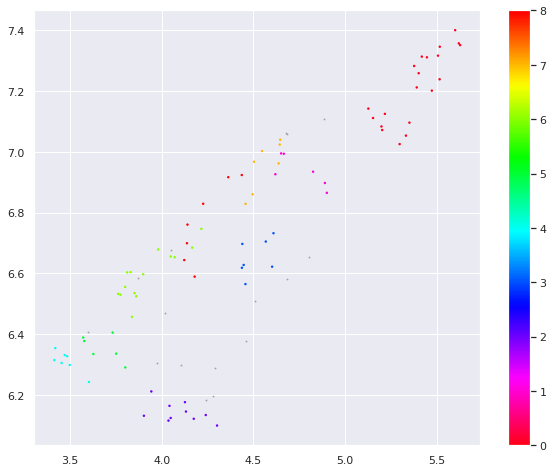

In [ ]:
# Visualisation of the embedded space - clustered HerBERT embeddings

lbls = clusters_herbert.labels_
legend=np.unique(lbls)
bounds = [n+1 for n in range (-1, len(legend), 1)]
print(legend)
clustered = (lbls >= 0)
plt.scatter(umap_herbert[~clustered, -1],
            umap_herbert[~clustered, 18],
            color=(0.5, 0.5, 0.5),
            label=-1,
            s=1,
            alpha=0.5)
plt.scatter(umap_herbert[clustered, -1],
            umap_herbert[clustered, 18],
            c=lbls[clustered],
            label=lbls[clustered],
            s=2,
            cmap='hsv_r');
plt.rcParams["figure.figsize"] = (10, 8)
plt.colorbar(ticks=bounds, cmap='hsv_r')

[-1  0  1  2  3  4  5  6  7  8  9]


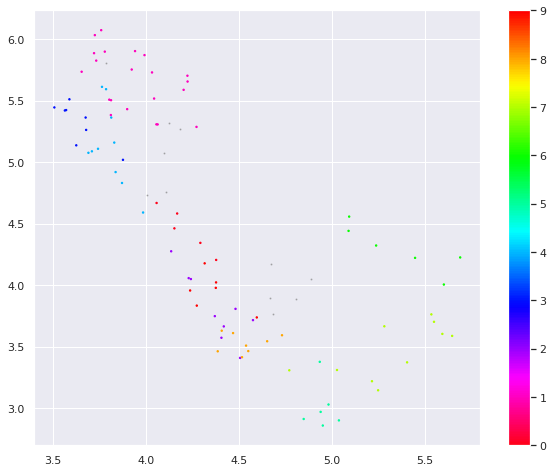

In [ ]:
# Visualisation of the embedded space - clustered GloVe embeddings

lbls = clusters_glove.labels_
legend=np.unique(lbls)
bounds = [n+1 for n in range (-1, len(legend), 1)]
print(legend)
clustered = (lbls >= 0)
plt.scatter(umap_glove[~clustered, -1],
            umap_glove[~clustered, 3],
            color=(0.5, 0.5, 0.5),
            label=-1,
            s=1,
            alpha=0.5)
plt.scatter(umap_glove[clustered, -1],
            umap_glove[clustered, 3],
            c=lbls[clustered],
            label=lbls[clustered],
            s=2,
            cmap='hsv_r');
plt.rcParams["figure.figsize"] = (10, 8)
plt.colorbar(ticks=bounds, cmap='hsv_r')

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


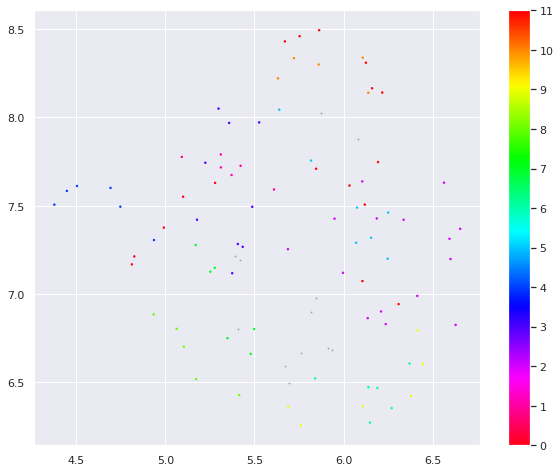

In [ ]:
# Visualisation of the embedded space - clustered doc2vec embeddings

lbls = clusters_doc2vec.labels_
legend=np.unique(lbls)
bounds = [n+1 for n in range (-1, len(legend), 1)]
print(legend)
clustered = (lbls >= 0)
plt.scatter(umap_doc2vec[~clustered, -1],
            umap_doc2vec[~clustered, 3],
            color=(0.5, 0.5, 0.5),
            label=-1,
            s=1,
            alpha=0.5)
plt.scatter(umap_doc2vec[clustered, -1],
            umap_doc2vec[clustered, 3],
            c=lbls[clustered],
            label=lbls[clustered],
            s=2,
            cmap='hsv_r');
plt.rcParams["figure.figsize"] = (10, 8)
plt.colorbar(ticks=bounds, cmap='hsv_r')

#### Modelling topics with LDA

In [ ]:
# Separate data for each type of embeddings
df_herbert = df
df_glove = df
df_doc2vec = df

df_herbert['cluster'] = 0
df_glove['cluster'] = 0
df_doc2vec['cluster'] = 0

In [ ]:
# Cluster assignments
for index, row in df_herbert.iterrows():
    df_herbert.at[index,'cluster'] = clusters_herbert.labels_[index]

for index, row in df_glove.iterrows():
    df_glove.at[index,'cluster'] = clusters_glove.labels_[index]

for index, row in df_doc2vec.iterrows():
    df_doc2vec.at[index,'cluster'] = clusters_doc2vec.labels_[index]

In [ ]:
# Sort the values by the cluster number
df_herbert = df_herbert.sort_values(by=['cluster'])
df_glove = df_glove.sort_values(by=['cluster'])
df_doc2vec = df_doc2vec.sort_values(by=['cluster'])

# Reset index
df_herbert = df_herbert.reset_index(drop=True)
df_glove = df_glove.reset_index(drop=True)
df_doc2vec = df_doc2vec.reset_index(drop=True)

In [ ]:
# Import stop words
sw_file = open("polish.stopwords.txt", "r")
sw_content = sw_file.readlines()

sw = []
for el in sw_content:
    el = el.replace("\n", "")
    sw.append(el)
# Remove some additional special characters and stop words (based on the keywords used for the tweet extraction)
additional_stopwords=[]
additional_stopwords = ["", '', "”", "„", "swój", "🇺🇦", "🇵🇱", "🇺", "-", "...", "…", "🇦", "–", "2", "r"]

sw = sw + additional_stopwords
stopwords = set(sw)

In [ ]:
# To calculate the coherence score and yield the topics
def calculate_coherence(dataset_prep, bow, dct, num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=bow,
                                    id2word=dct,
                                    num_topics=num_topics,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha=50/4,
                                    eta = 0.1)
    pprint(lda_model.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True))

    npmi = CoherenceModel(texts=dataset_prep, corpus=bow, dictionary=dct, model=lda_model, coherence="c_v")
    coherence = npmi.get_coherence()

    return coherence

In [ ]:
# Method to generate topics over the clusters yielded over the specified embeddings type
def generate_topics(clusters_no, df):
    clusters_lists = []
    for i in range(0, (clusters_no-1)):
        df_cl1 = df[df.cluster == i]
        cl1 = df_cl1['text'].tolist()
        clusters_lists.append(cl1)

    # Data cleaning
    dt = []
    all = []
    for cluster in clusters_lists:
        temp_cluster = []
        for elem in cluster:
            all.append(elem)
            split_dt = elem.split()
            temp_dt = [(x.lower()).translate(str.maketrans('', '', string.punctuation)) for x in split_dt if not((x.lower()).translate(str.maketrans('', '', string.punctuation)) in stopwords)]
            temp_cluster.append(temp_dt)
        dt.append(temp_cluster)

    dataset = dt

    total = 0
    for cluster_no in range(0, clusters_no-1):
        print("CLUSTER NUMBER ", str(cluster_no))
        dataset_prep = dataset[cluster_no]
        dct = Dictionary(dataset_prep)
        bow = [dct.doc2bow(text) for text in dataset_prep]

        score = calculate_coherence(dataset_prep, bow, dct, 1)
        total += score

        print("CLUSTER SCORE: ", score)
        print("___________________________")

    print("TOTAL SCORE: ", total/clusters_no)


In [ ]:
# Generating topics for HerBERT
generate_topics(len(np.unique(clusters_herbert.labels_)), df_herbert)

CLUSTER NUMBER  0
[(0,
  '0.029*"granicy" + 0.029*"pomoc" + 0.020*"ukrainie" + 0.020*"usa" + '
  '0.020*"kryzys" + 0.020*"polska" + 0.020*"białorusi" + 0.020*"nato" + '
  '0.010*"zelenski" + 0.010*"dzieje"')]
CLUSTER SCORE:  0.6290728664214637
___________________________
CLUSTER NUMBER  1
[(0,
  '0.056*"pomoc" + 0.029*"prezydent" + 0.029*"przejściu" + 0.029*"sytuacja" + '
  '0.029*"biden" + 0.029*"daje" + 0.029*"nowe" + 0.029*"granicy" + '
  '0.029*"przemówienie" + 0.029*"wojny"')]
CLUSTER SCORE:  0.4973646963109409
___________________________
CLUSTER NUMBER  2
[(0,
  '0.045*"nato" + 0.045*"jaka" + 0.045*"pomocy" + 0.023*"kijów" + 0.023*"broń" '
  '+ 0.023*"zaatakowany" + 0.023*"pomocukrainie" + 0.023*"ukraińska" + '
  '0.023*"rodziny" + 0.023*"dostaje"')]
CLUSTER SCORE:  0.5838053533715983
___________________________
CLUSTER NUMBER  3
[(0,
  '0.030*"putina" + 0.030*"atakowano" + 0.030*"kraju" + 0.030*"organizowane" + '
  '0.030*"zbiórki" + 0.030*"nikt" + 0.030*"plany" + 0.030*"całym" 

In [ ]:
# Generating topics for GloVe
generate_topics(len(np.unique(clusters_glove.labels_)), df_glove)

CLUSTER NUMBER  0
[(0,
  '0.048*"nato" + 0.048*"broni" + 0.048*"putin" + 0.048*"przegrywają" + '
  '0.048*"zbliża" + 0.048*"uchodźców" + 0.048*"nowa" + 0.048*"grupa" + '
  '0.048*"wysłać" + 0.048*"pomoc"')]
CLUSTER SCORE:  0.5174067995015161
___________________________
CLUSTER NUMBER  1
[(0,
  '0.030*"pomoc" + 0.020*"ukrainie" + 0.020*"putina" + 0.020*"ukraińska" + '
  '0.020*"usa" + 0.020*"stało" + 0.020*"armia" + 0.020*"wołyniu" + '
  '0.020*"biden" + 0.011*"przemówienie"')]
CLUSTER SCORE:  0.6134844217004225
___________________________
CLUSTER NUMBER  2
[(0,
  '0.069*"wojny" + 0.024*"wygra" + 0.024*"najstraszliwsze" + 0.024*"1943" + '
  '0.024*"1945" + 0.024*"atakowano" + 0.024*"polaków…" + 0.024*"ukraina" + '
  '0.024*"wierze" + 0.024*"pomocukrainie"')]
CLUSTER SCORE:  0.6392973753933939
___________________________
CLUSTER NUMBER  3
[(0,
  '0.041*"wsparcia" + 0.041*"pomóc" + 0.021*"ubrania" + 0.021*"coraz" + '
  '0.021*"zbiórkę" + 0.021*"wrocławiu" + 0.021*"podejmuje" + '
  '0.021*

In [ ]:
# Generating topics for doc2vec
generate_topics(len(np.unique(clusters_doc2vec.labels_)), df_doc2vec)

CLUSTER NUMBER  0
[(0,
  '0.053*"nikt" + 0.053*"ukrainy" + 0.053*"słyszałam" + 0.053*"niedaleko" + '
  '0.053*"granicy" + 0.053*"wołyniu" + 0.053*"stało" + 0.053*"pamięta" + '
  '0.053*"dotyka" + 0.053*"wojna"')]
CLUSTER SCORE:  0.5479044599522378
___________________________
CLUSTER NUMBER  1
[(0,
  '0.074*"polski" + 0.039*"ewakuują" + 0.039*"ukraina" + 0.039*"usa" + '
  '0.039*"dzieci" + 0.039*"pomocy" + 0.039*"kobiety" + 0.039*"drożeje" + '
  '0.039*"zastaną" + 0.039*"nato"')]
CLUSTER SCORE:  0.5336687007454769
___________________________
CLUSTER NUMBER  2
[(0,
  '0.041*"wojny" + 0.041*"usa" + 0.041*"ukrainie" + 0.028*"zaatakowany" + '
  '0.028*"putin" + 0.028*"broń" + 0.028*"pomoc" + 0.014*"armii" + '
  '0.014*"przeraża" + 0.014*"kijów"')]
CLUSTER SCORE:  0.5658776887339149
___________________________
CLUSTER NUMBER  3
[(0,
  '0.046*"pomocy" + 0.046*"dzieje" + 0.024*"wołyniu" + 0.024*"ciekawe" + '
  '0.024*"ukraińska" + 0.024*"atakowano" + 0.024*"dzieci" + 0.024*"kobiety" + '
  '0.0

## Import data

In [ ]:
# Read the csv file containing the tweets
df = pd.read_csv('dataset.csv')

In [ ]:
# Extract the text field from the csv file only
df_sent_txt = df['text']
df_sent_list = df_sent_txt.values.tolist()

In [ ]:
# Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

## HerBERT embeddings

Obtaining word embeddings from the base vased HerBERT model
(https://huggingface.co/allegro/herbert-base-cased)

In [ ]:
# HerBERT Word embeddings
# Load the model (HerBERT base cased) and the tokenizer
tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
model = AutoModel.from_pretrained("allegro/herbert-base-cased")
model.eval()

In [ ]:
# Obtain the embeddings
all_embeddings=[]
batch_size=50

for i in range(0, len(df_sent_list), batch_size):
    print("Iteration " + str(i))
    encoded_sent = tokenizer.batch_encode_plus(
        df_sent_list_cut[i : i + batch_size],
        max_length=192,
        add_special_tokens=True,
        padding="max_length",
        pad_to_max_length=True,
        truncation=True,
        return_tensors="pt",  
    )
    
    output = model(**encoded_sent)
    all_embeddings.append((output.pooler_output).to("cpu").detach().numpy())

    if (i % 1000 == 0):
        # Save to Google Drive
        np.save("/content/drive/MyDrive/embeddings/"+str(i), all_embeddings)

In [ ]:
# Load embeddings from the drive
embs = np.load("/content/drive/MyDrive/embeddings/emb0_950.npy")

In [ ]:
# Turn batches of embeddings into one array
all_embs = []
for batch in embs:
    for elem in batch:
        all_embs.append(elem)

In [ ]:
# Sanity check of the shape of the embeddings
np.array(emb_list).shape

In [ ]:
# Code utilised to store attention output of the HerBERT heads
all_embeddings=[]
all_embeddings2=[]
all_embeddings3=[]

batch_size=50

for i in range(0, len(df_sent_list), batch_size):
    print("Iteration " + str(i))
    encoded_sent = tokenizer.batch_encode_plus(
        df_sent_list_cut[i : i + batch_size],
        max_length=192,
        add_special_tokens=True,
        padding="max_length",
        pad_to_max_length=True,
        truncation=True,
        return_tensors="pt",  
    )
    output = model(**encoded_sent)
    # Due to the processing limitations, attention output is stored in parts
    all_embeddings.append(output[-1][0].to("cpu").detach().numpy())
    all_embeddings2.append(output[-1][1].to("cpu").detach().numpy())
    all_embeddings3.append(output[-1][2].to("cpu").detach().numpy())

    if (i % 1000 == 0 or i == 950) and i != 0:
        # Storing on drive
        np.save("/content/drive/MyDrive/embeddings4/emb9_"+str(i), all_embeddings)
        time.sleep(2)
        np.save("/content/drive/MyDrive/embeddings4/emb10_"+str(i), all_embeddings2)
        time.sleep(2)
        np.save("/content/drive/MyDrive/embeddings4/emb11_"+str(i), all_embeddings3)

## GloVe embeddings

Obtaining the GloVe word embeddings.

#### Preprocessing for GloVe

To obtain the GloVe representation, the text is additionally preprocessed by removing stopwords, special characters, and lemmatisation.

In [ ]:
# Load the Polish stopwords from an external file
sw_file = open("polish.stopwords.txt", "r")
sw_file_content = sw_file.readlines()

# Format the stopwords
stopwords = []
for el in sw_file_content:
    el = el.replace("\n", "")
    stopwords.append(el)

In [ ]:
def preprocess_dataset(dataset):
    for index, row in dataset.iterrows():
        # Set options for the tweet-preprocessor library
        p.set_options(p.OPT.SMILEY)
        clean_row = p.clean(row['text'])
        if clean_row[0] == ":":
            clean_row = clean_row[1:]
        dataset.at[index,'text'] = clean_row
        # Remove stopwords and punctuation
        split_dt = clean_row.split(" ")
        temp_dt = [(x.lower()).translate(str.maketrans('', '', string.punctuation)) for x in split_dt if not((x.lower()).translate(str.maketrans('', '', string.punctuation)) in stopwords)]
        temp_dt = clean_row
        # Lemmatise
        lem = nlp(temp_dt)        
        cleaned = ""
        count = 0
        for el in lem:
            if count == len(lem):
                cleaned += el.lemma_
            else:
                cleaned += el.lemma_ + " "
        # Insert the clean row in the dataframe
        dataset.at[index,'text'] = cleaned
    return dataset

In [ ]:
df_clean = preprocess_dataset(df)

#### Obtaining embeddings

In [ ]:
# Load the Stanford GloVe model (300d)
from gensim.models import KeyedVectors
# filename = "/content/drive/MyDrive/glove_300_3_polish.txt"

In [ ]:
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Only extract text from the dataframe columns
data = df[['text']]

In [ ]:
# Calculation of the mean vector for each data sample
def get_mean_vector(glove_model, words):
    # remove words which are not in the vocabulary
    words = [word for word in words if word in glove_model.vocab]
    if len(words) >= 1:
        return np.mean(glove_model[words], axis=0)
    else:
        return []

In [ ]:
# Save embeddings in the vectors array
vectors = []
for index, row in data.iterrows():
    if index%100 == 0:
        print("Iteration ", str(index))
    vec = get_mean_vector(model, row['text'])
    if len(vec) == 0:
        vec = [0]*300
    vectors.append(vec)

In [ ]:
# Save the vectors in the file
np.save("vectors.npy", vectors)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
# To load the vectors
#vectors = np.load("vectors.npy", allow_pickle=True)

## doc2vec Embeddings

Obtaining the doc2vec embeddings.

In [ ]:
# Convert the text from the dataframe to lowercase
for index, row in df.iterrows():
    df.at[index, 'text'] = str(df.at[index, 'text']).lower()

In [ ]:
# Save the text in the list
data = df[['text']].values.tolist()

In [ ]:
# Save each tweet in the TaggedDocument doc2vec format
sentences = [TaggedDocument(sentence, 'tag') for sentence in data]

In [ ]:
# Define the doc2vec model and the hyperparameters
max_epochs = 100
alpha = 0.025

model = Doc2Vec(alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm=1)

In [ ]:
# Build vocabulary
model.build_vocab(sentences) 

In [ ]:
# Train the doc2vec model
# Training over 100 epochs
for epoch in range(max_epochs):
    print('Iteration {0}'.format(epoch))
    model.train(sentences,
                total_examples=model.corpus_count,
                epochs = model.epochs)
    model.alpha -= 0.0002 
    model.min_alpha = model.alpha

model.save("doc2vec_model.model")

In [ ]:
# Save the vectors
doc_vectors = []

for index, row in df.iterrows():
    text = row['text']

    vec = model.infer_vector(text)
    doc_vectors.append(vec)

In [ ]:
# Save the vectors
np.save("doc2vecvec.npy", doc_vectors)

## UMAP Dimensionality Reduction and HDBSCAN Clustering

In this section, UMAP algorithm is applied on the embeddings for the purpose of dimensionality reduction. Then, HDBSCAN is employed to perform clustering.

In [ ]:
# Method to generate and return clusters using HDBSCAN
def generate_clusters(umap_embeddings,
                    min_cluster_size,
                    min_samples,
                    random_state = None):
    
    # Apply HDBSCAN clustering on the previously UMAP-reduced embeddings
    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               min_samples = min_samples,
                               metric='manhattan', 
                               cluster_selection_method='leaf',
                               gen_min_span_tree=True, 
                               prediction_data=True).fit(umap_embeddings) 

    return umap_embeddings, clusters

In [ ]:
# when loading embeds
embeds = np.array(np.load("24_06_13k_embeds.npy"))

In [ ]:
all_embs = []
# Turn batches of embeddings into one array
for batch in embs:
    for elem in batch:
        all_embs.append(elem)

np.array(embs).shape

In [ ]:
# Reduce dimensionality of the embeddings using the UMAP algorithm
umap_embed = UMAP(n_neighbors=100, n_components=20, min_dist=0, metric='cosine', random_state=42).fit_transform(embs_reduced)

In [ ]:
# Loading embeddings
umap_embed = joblib.load("doc2vec_embed_umap_10_20.sav")

In [ ]:
# Saving embeddings
joblib.dump(umap_embed, "umap_head11_50_20.sav")

In [ ]:
# Call the method to generate the clusters on the embeddings reduced with UMAP
um, clst = generate_clusters(umap_embed,
                      160,
                      1)

In [ ]:
# Visualise the condensed tree of the clusters
clst.condensed_tree_.plot(select_clusters=True)

In [ ]:
# Check how many clusters were obtained
len(np.unique(clst.labels_))

In [ ]:
# Check how many data samples were classified as noise
len(clst.labels_[clst.labels_== -1])

In [ ]:
# Relative validity score (DBCV)
clst.relative_validity_

In [ ]:
# Validity score (DBCV)
hdbscan.validity.validity_index(np.array(umap_embed, dtype='double'), clst.labels_, metric='euclidean', d=None, per_cluster_scores=False)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


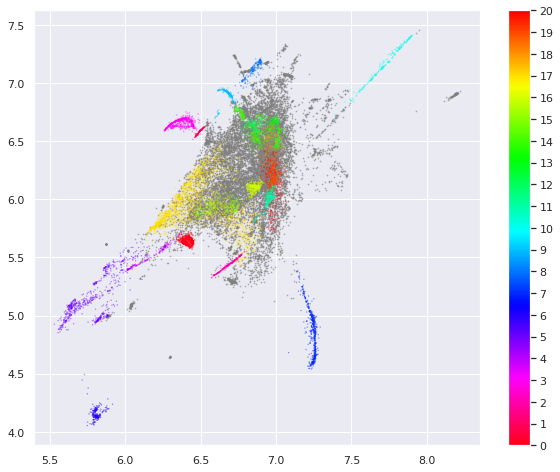

In [ ]:
# Visualisation of the embedded space

lbls = clst.labels_
legend=np.unique(lbls)
bounds = [n+1 for n in range (-1, len(legend), 1)]
print(legend)
clustered = (lbls >= 0)
plt.scatter(um[~clustered, -1],
            um[~clustered, 18],
            color=(0.5, 0.5, 0.5),
            label=-1,
            s=0.6,
            alpha=0.5)
plt.scatter(um[clustered, -1],
            um[clustered, 18],
            c=lbls[clustered],
            label=lbls[clustered],
            s=0.05,
            cmap='hsv_r');
plt.rcParams["figure.figsize"] = (10, 8)


plt.colorbar(ticks=bounds, cmap='hsv_r')

## Hyperparameters Search




This section contains code written to look for hyperparameters of the UMAP and HDBSCAN algorithms.

In [ ]:
# Method to generate UMAP-reduced embeddngs based on a sampled set of hyperparameters and then apply RandomizedSearchCV from sklearn to find hyperparameters for HDBSCAN
def random_search(re_embeddings, space, num_evals):
    results = []
    
    for i in range(num_evals):
        # UMAP params
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        # UMAP dimensionality reduction
        embeddings = (UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=None)
                            .fit_transform(re_embeddings))

        hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(embeddings)
        # Define the scorer
        validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)
        # RandomizedSearchCV used to sample from the distribution (space) to look for the best parameters combination
        iters = 20
        random_search = RandomizedSearchCV(hdb
                                        ,param_distributions=param_dist
                                        ,n_iter=iters
                                        ,scoring=validity_scorer
                                        ,cv=5
                                        ,random_state=42)

        random_search.fit(embeddings)

        #Print the score
        print(i)
        print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")

        results_dict = dict(random_search.best_params_)
                
        results.append([i, n_neighbors, n_components, results_dict['min_cluster_size'], 
                        results_dict['min_samples'], results_dict['metric'], results_dict['cluster_selection_method'], random_search.best_estimator_.relative_validity_])
    # Store all results in the dataframe
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'min_samples', 'metric', 'cluster selection method', 'score'])
    
    return result_df.sort_values(by='score')

In [ ]:
# Random search for the best combination of the HDBSCAN hyperparameters. UMAP-reduced embeddings are passed as an argument. 
def random_search2(embeddings, space, num_evals):    
    results = []
    # Iterate through the number specified in the num_evals variable and look for the best combination of hyperparameters
    for i in range(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        min_samples = random.choice(space['min_samples'])
        # Generate clusters with HDBSCAN
        um, clusters = generate_clusters( embeddings, 
                                    min_cluster_size = min_cluster_size, 
                                    min_samples = min_samples,
                                    random_state = 42)
        # Score clusters
        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
        # Check how many samples were classified as noise
        left = len(clusters.labels_[clusters.labels_== -1])
                
        results.append([i, n_neighbors, n_components, min_cluster_size, min_samples,
                        label_count, left, cost])
    # Save results in the dataframe
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'min_samples', 'label_count', 'left', 'cost'])    
    return result_df.sort_values(by='cost')

In [ ]:
# Distribution of hyperparameters from which samples are taken
space = {
    "n_neighbors": range(10, 50),
    "n_components": range(3, 7),
    "min_cluster_size": range(2, 30),
    'cluster_selection_method' : ['eom','leaf'],
    'metric' : ['euclidean','manhattan'], 
    "random_state": 42
}

In [ ]:
embeddings = umap_embed

logging.captureWarnings(True)
hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(embeddings)
 
# specify parameters and distributions to sample from
param_dist = {'min_samples': range(1, 10),
            'min_cluster_size':range(80,200),  
            'cluster_selection_method' : ['leaf'],
            'metric' : ['manhattan'] 
            }

#validity_scroer = "hdbscan__hdbscan___HDBSCAN__validity_index"
validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)


n_iter_search = 10
random_search = RandomizedSearchCV(hdb
                                ,param_distributions=param_dist
                                ,n_iter=n_iter_search
                                ,scoring=validity_scorer
                                ,cv=5
                                ,random_state=42)

random_search.fit(embeddings)
results_dict = dict(random_search.best_params_)
print(results_dict)
print(random_search.best_estimator_.relative_validity_)

In [ ]:
# Score clusters - return the relative validity score as implemented in the HDBSCAN library
def score_clusters(clusters, prob_threshold = 0.05):    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = clusters.relative_validity_
    
    return label_count, cost

In [ ]:
# Call the methods
random_use = random_search(umap_embed, space, 5)

In [ ]:
random_search2(umap_embed, space, 100)

## Sorting the dataset

Code written to insert cluster information into the dataset and sort it by the cluster number.

In [ ]:
# Insert cluster information into the dataset
df = pd.read_csv("df_encoded.csv")

for index, row in df.iterrows():
    df.at[index,'cluster'] = clst.labels_[index]

In [ ]:
# Sort the values by the cluster number
df_val = df.sort_values(by=['cluster'])

In [ ]:
# Reset index
df_val = df_val.reset_index(drop=True)

In [ ]:
# Save the dataset as a csv file
df_val.to_csv("df_v2.csv", encoding='utf-8-sig')

## Assign geolocation to provinces

In [ ]:
# wojewodztwa.json was a file containing a list of Polish towns and villages associated with the provinces, utilised for the allocation of places to provinces
f = open('wojewodztwa.json')
woj = json.loads(f.read())
woj_df = pd.DataFrame(woj)

In [ ]:
# Convert Twitter geo objects stored in the csv file into JSON objects
df_nondup = df
df_nondup['place_id'] = ""
for index, row in df_nondup.iterrows():
    el = row['geo']
    if type(el) == str:
        idx_geo = el.replace("'", '"')
        geoobj = json.loads(idx_geo)
        if 'place_id' in geoobj:
            df_nondup.at[index, 'place_id'] = geoobj['place_id']
        else:
            df_nondup.at[index, 'place_id'] = " "
    else:
        df_nondup.at[index, 'place_id'] = " "

In [ ]:
# Preparing data - iterate through each of the dataframe rows and assign the province
geo_tagged_df = df_nondup
geo_tagged_df['district'] = ""
geo_tagged_df['distr_found'] = 0

# Iterate through dataframe rows
for index, row in geo_tagged_df.iterrows():
    place = str(row['place_name'])
    place = place.translate(str.maketrans('', '', string.punctuation))
    place_elems = place.split(" ")
    temp_elem = ""
    right_elems = 0
    for elem in place_elems:
        # Convert Polish symbols to English using unidecode for compability with the results from Twitter API
        elem = unidecode(elem)
        elem = elem.lower()
        # Find the element in the dataframe of provinces
        elem_df = woj_df[woj_df.Name.str.lower() == elem]
        if(len(elem_df) > 0):
            temp_elem = elem_df.values[0][3]
            right_elems += 1
        # Popular alternatives to name the Polish capital
        elif elem in ["warsaw", "wwa", "wawa", "wawka", "varsovia"]:
            temp_elem = "mazowieckie"
            right_elems += 1
        # If the element is already a name of a province
        elif elem in ["dolnoslaskie", "kujawsko-pomorskie", "lubelskie", "lubuskie", "lodzkie", "malopolskie", "mazowieckie", "opolskie", "podkarpackie", "podlaskie", "pomorskie", "slaskie", "swietokrzyskie", "warminsko-mazurskie", "wielkopolskie", "zachodniopomorskie"]:
            temp_elem = elem
            right_elems += 1

        if temp_elem == "":
            # Unsupported cases done manually (unsupported cases are the ones which are not included in the imported files with provinces associated with towns and villages)
            if elem == "Wolsztyn" or elem == "Oborniki" or elem == "Steszew" or elem == "Mosina" or elem == "Czerniejewo" or elem == "Swarzedz":
                temp_elem = "wielkopolskie"
            if elem == "Siedlce" or elem == "Piaseczno" or elem == "Sejm Rzeczypospolitej Polskiej":
                temp_elem = "mazowieckie"
            if elem == "Slubice" or elem == "Strzelce Krajenskie":
                temp_elem = "lubuskie"
            if elem == "Rajgrod" or elem == "Choroszcz":
                temp_elem = "podlaskie"
            if elem == "Wyzsza Szkola Informatyki i Zarzadzania":
                temp_elem = "podkarpackie"
            if elem == "Silesia" or elem == "South West" or elem == "Siechnice" or elem == "Swidnica" or elem == "Olawa" or elem == "Jelcz-Laskowice" or elem == "Boleslawiec" or elem == "Zgorzelec":
                temp_elem = "dolnośląskie"
            if elem == "Czechowice-Dziedzice" or elem =="Wilamowice" or elem == "Miedzynarodowe Centrum Kongresowe":
                temp_elem = "śląskie"
            if elem == "Dobra (Szczecinska)" or elem == "Goleniow" or elem == "Borne Sulinowo" or elem == "Stargard Szczecinski" or elem == "Goscino":
                temp_elem = "zachodniopomorskie"
            if elem == "Zychlin":
                temp_elem = "łódzkie"
            if elem == "Kedzierzyn-Kozle" or elem == "Krapkowice" or elem == "Zdzieszowice" or elem == "Opole Province":
                temp_elem = "opolskie"
            if elem == "Korczowa Dolyna" or elem == "South East" or elem == "Glogow Malopolski" or elem == "Kolbuszowa" or elem == "Ustrzyki Dolne":
                temp_elem = "podkarpackie"
            if elem == "Lesser Poland" or elem == "Krakow Glowny" or elem == "Niepolomice" or elem == "Wieliczka" or elem == "Kocmyrzow-Luborzyca":
                temp_elem = "małopolskie"
            if elem == "Swiecie" or elem == "Kruszwica" or elem == "Janikowo" or elem == "Strzelno":
                temp_elem = "kujawsko-pomorskie"
            if elem == "Strzelce Krajenskie":
                temp_elem = "lubuskie"
            if elem == "Łódź":
                temp_elem = "łódzkie"
            if elem == "Rozlewisko Narwi":
                temp_elem = "podlaskie"
            if elem == "Pruszcz Gdanski" or elem == "Plac Solidarnosci":
                temp_elem = "pomorskie"
            if elem == "Ozarow":
                temp_elem = "świętokrzyskie"

    if type(temp_elem) != str:
        print(temp_elem)
    # Store in the dataframe
    if temp_elem != "":
        geo_tagged_df.at[index, 'district'] = temp_elem
        geo_tagged_df.at[index, 'distr_found'] = 1
    else:
        geo_tagged_df.at[index, 'district'] = ""
        geo_tagged_df.at[index, 'distr_found'] = 0

In [ ]:
# Further standardise the districts' names
for cluster in clusters_lists:
    for i in range (0, len(cluster)):
        cluster[i] = unidecode(cluster[i])
        if cluster[i] == "kujawskopomorskie":
            cluster[i] = "kujawsko-pomorskie"
        if cluster[i] == "warminskomazurskie":
            cluster[i] = "warminsko-mazurskie"

In [ ]:
# Check and store how many data samples come from each district
n = [str(i) for i in range (0, len(np.unique(clst.labels_))-1)]
nms = ["woj"] + n
geo_df = pd.DataFrame(columns=["dolnoslaskie", "kujawsko-pomorskie", "lubelskie", "lubuskie", "lodzkie", "malopolskie", "mazowieckie", "opolskie", "podkarpackie", "podlaskie", "pomorskie", "slaskie", "swietokrzyskie", "warminsko-mazurskie", "wielkopolskie", "zachodniopomorskie"])

woj_data = []
for elem in ["dolnoslaskie", "kujawsko-pomorskie", "lubelskie", "lubuskie", "lodzkie", "malopolskie", "mazowieckie", "opolskie", "podkarpackie", "podlaskie", "pomorskie", "slaskie", "swietokrzyskie", "warminsko-mazurskie", "wielkopolskie", "zachodniopomorskie"]:
    for cluster in clusters_lists:
        temp = []
        for e in clusters_lists:
            found=False
            for i in e:
                i=list(i)
                if i[0] == elem:
                    found=True
                    temp.append(i[1])
            if not(found):
                temp.append(0)
    woj_data.append(temp)

In [ ]:
# Assign number of times cluster appears in the given region
column_names=["dolnoslaskie", "kujawsko-pomorskie", "lubelskie", "lubuskie", "lodzkie", "malopolskie", "mazowieckie", "opolskie", "podkarpackie", "podlaskie", "pomorskie", "slaskie", "swietokrzyskie", "warminsko-mazurskie", "wielkopolskie", "zachodniopomorskie"]
geo_df = pd.DataFrame(dict(zip(column_names, woj_data)))


## LDA

In [ ]:
# Import stop words
sw_file = open("polish.stopwords.txt", "r")
sw_content = sw_file.readlines()

sw = []
for el in sw_content:
    el = el.replace("\n", "")
    sw.append(el)
# Remove some additional special characters and stop words (based on the keywords used for the tweet extraction)
additional_stopwords=[]
additional_stopwords = ["", '', "”", "„", "🇺🇦", "🇵🇱", "🇺", "-", "...", "…", "🇦", "–", "2", "r", "ukrainiec", "ukrainą", "ukraine", "ukrainę", "putin", "putina", "rosjanie", "rosja", "rosją", "rosji", "uchodźców", "ukraińcy", "ukraincy", "ukraina", "ukrainy", "wojna", "wojny", "ukraińców", "ukrainie", "uchodźcy", "uchodzcy"]

sw = sw + additional_stopwords
stopwords = set(sw)

In [ ]:
# Read the csv file with the dataset
df = pd.read_csv("clustered_dataset.csv")

In [ ]:
# Leave three columns in the dataset - id, text, and cluster number
docs_df = df[['id', 'text', 'cluster']]

In [ ]:
# Group by the cluster number
docs_per_topic = docs_df.groupby(['cluster'], as_index = False).agg({'text': ' '.join})

In [ ]:
# Store tweets in separate lists, according to the assigned clusters
clusters_no = 8 
df_val_th = df
clusters_lists = []
for i in range(0, (clusters_no)):
    df_cl1 = df_val_th[df_val_th.cluster == i]
    cl1 = df_cl1['text'].tolist()
    clusters_lists.append(cl1)

In [ ]:
dataset = docs_per_topic.values.tolist()
dataset = dataset[1:]

In [ ]:
dataset = clusters_lists

In [ ]:
# Remove stop words
counter = 0
dt = []
for cluster in dataset:
    temp_cluster = []
    for elem in cluster:
        split_dt = elem.split()
        temp_dt = [(x.lower()).translate(str.maketrans('', '', string.punctuation)) for x in split_dt if not((x.lower()).translate(str.maketrans('', '', string.punctuation)) in stopwords)]
        temp_cluster.append(temp_dt)
    dt.append(temp_cluster)
    counter += 1

dataset=dt

In [ ]:
# Create dictionary
dataset_prep = dataset[1]
dct = Dictionary(dataset_prep)

In [ ]:
# bag of words representation
bow = [dct.doc2bow(text) for text in dataset_prep]

In [ ]:
# Method to calculate the topic coherence score based on the supplied bag of words representation, constructed dictionary, and the specified number of topics
def calculate_coherence(bow, dct, num_topics):
    # LDA model from the Gensim library
    lda_model = gensim.models.ldamodel.LdaModel(corpus=bow,
                                    id2word=dct,
                                    num_topics=num_topics,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha=50/4,
                                    eta = 0.1)
    pprint(lda_model.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=True))

    npmi = CoherenceModel(texts=dataset_prep, corpus=bow, dictionary=dct, model=lda_model, coherence="c_v")
    coherence = npmi.get_coherence()

    return coherence

### Topic Coherence

In [ ]:
# Get topic coherence scores for the different values of the topics number
scores = []
# Iterate and test topics in range from 1 to 20
for topic_no in range(1, 21):
    print("Topic: ", str(topic_no))
    clusters_sum = 0
    for cluster_no in range(1, clusters_no):

        dataset_prep = dataset[cluster_no]
        dct = Dictionary(dataset_prep)

        bow = [dct.doc2bow(text) for text in dataset_prep]

        score = calculate_coherence(bow, dct, topic_no)
        clusters_sum += score

    av_score = clusters_sum / clusters_no
    scores.append(av_score)

    print("Average score: ", av_score)
    print("___________________________")

# (Example output on GloVe)

Topic:  1
Average score:  0.6406465367491316
___________________________
Topic:  2
Average score:  0.6142524224252438
___________________________
Topic:  3
Average score:  0.5987730081683864
___________________________
Topic:  4
Average score:  0.6114119866058769
___________________________
Topic:  5
Average score:  0.608603480891773
___________________________
Topic:  6
Average score:  0.597778952022402
___________________________
Topic:  7
Average score:  0.6014835434623247
___________________________
Topic:  8
Average score:  0.5917044641082628
___________________________
Topic:  9
Average score:  0.5898354046063847
___________________________
Topic:  10
Average score:  0.600637659411334
___________________________
Topic:  11
Average score:  0.598536577052943
___________________________
Topic:  12
Average score:  0.5920452698610978
___________________________
Topic:  13
Average score:  0.5881856148443217
___________________________
Topic:  14
Average score:  0.5792782029916906
_____

In [ ]:
# Print the topics and the topic coherence score for each cluster
for cluster_no in range(0, 17):
    print("CLUSTER NUMBER ", str(cluster_no))
    dataset_prep = dataset[cluster_no]
    dct = Dictionary(dataset_prep)

    bow = [dct.doc2bow(text) for text in dataset_prep]

    score = calculate_coherence(bow, dct, 1)

    print("CLUSTER SCORE: ", score)
    print("___________________________")

# (Example output on GloVe)

CLUSTER NUMBER  0
[(0,
  '0.006*"chcą" + 0.005*"mieli" + 0.004*"niemcy" + 0.003*"granicy" + '
  '0.003*"widzę" + 0.003*"jeńców" + 0.003*"nadzieję" + 0.003*"życie" + '
  '0.003*"dalej" + 0.003*"pewnie"')]
CLUSTER SCORE:  0.7340022953705768
___________________________
CLUSTER NUMBER  1
[(0,
  '0.003*"mamy" + 0.003*"mówią" + 0.003*"sami" + 0.003*"niemcy" + '
  '0.003*"siebie" + 0.003*"samo" + 0.003*"ruskie" + 0.003*"nikt" + '
  '0.003*"muszą" + 0.003*"wiedzą"')]
CLUSTER SCORE:  0.6970743772733317
___________________________
CLUSTER NUMBER  2
[(0,
  '0.004*"pomoc" + 0.004*"polacy" + 0.003*"ludzi" + 0.003*"motyka" + '
  '0.002*"ludzie" + 0.002*"polaków" + 0.002*"swoich" + 0.002*"broń" + '
  '0.002*"dzieci" + 0.002*"europie"')]
CLUSTER SCORE:  0.7313608470131898
___________________________
CLUSTER NUMBER  3
[(0,
  '0.006*"nikt" + 0.005*"solidarnizukrainą" + 0.005*"ruskie" + 0.004*"sami" + '
  '0.004*"niemcy" + 0.003*"solidaritywithukraine" + 0.003*"rosjan" + '
  '0.003*"białorusini" + 0.003*

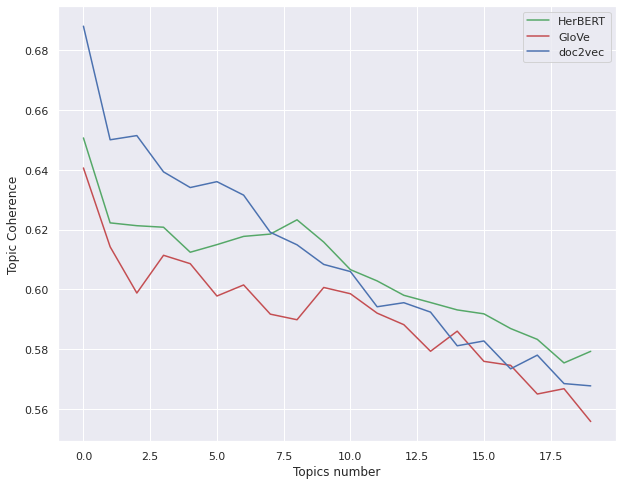

In [ ]:
# Generate a plot preseting topic coherence score value for different embeddings, for different values of the topics number
y=scores0
y2=scores
y3=scores2
x = range(0, 20)


plt.plot(x, y, 'g', label='HerBERT')
plt.plot(x, y2, 'r', label='GloVe')
plt.plot(x, y3, 'b', label='doc2vec')

plt.xlabel("Topics number")
plt.ylabel("Topic Coherence")

plt.legend()

plt.rcParams["figure.figsize"] = (10, 8)

plt.show()